In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Importar la Base de Datos

El DataFrame original, se renombrado como df

In [2]:
df = pd.read_csv("listings.csv")

# Primera Exploracion del Dataset

## Head

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,269467,https://www.airbnb.com/rooms/269467,20240615011618,2024-06-15,city scrape,Sunny and quiet Loft next to Sagrada Familia,The apartment is a cosy open space with 65 m2....,NaN,https://a0.muscache.com/pictures/a6445a90-94eb...,1411775,...,4.79,4.81,4.67,HUTB-001129,t,3,3,0,0,1.15
1,270197,https://www.airbnb.com/rooms/270197,20240615011618,2024-06-15,city scrape,*monthly stays* 4 Bedroom Apartment near Rambla,Rented only for monthly periods. 4 bedroom apa...,NaN,https://a0.muscache.com/pictures/69907440-d8df...,1414702,...,5.00,5.00,4.50,N/A SOLO ESTANCIAS MENSUALES,f,27,27,0,0,0.02
2,18674,https://www.airbnb.com/rooms/18674,20240615011618,2024-06-15,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.68,4.78,4.30,HUTB-002062,t,27,27,0,0,0.30
3,272282,https://www.airbnb.com/rooms/272282,20240615011618,2024-06-15,previous scrape,"CHARMING, VERY SPACIOUS & BEST LOCATED",Very spacious apartment located in a modernist...,Eixample is famous for being home to the major...,https://a0.muscache.com/pictures/monet/Select-...,1425070,...,4.96,4.84,4.80,HUTB003208,f,1,1,0,0,2.84
4,23197,https://www.airbnb.com/rooms/23197,20240615011618,2024-06-15,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax","Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.62,4.64,HUTB005057,f,1,1,0,0,0.48


## Shape

In [4]:
df.shape

(18925, 75)

## Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18925 entries, 0 to 18924
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18925 non-null  int64  
 1   listing_url                                   18925 non-null  object 
 2   scrape_id                                     18925 non-null  int64  
 3   last_scraped                                  18925 non-null  object 
 4   source                                        18925 non-null  object 
 5   name                                          18925 non-null  object 
 6   description                                   18242 non-null  object 
 7   neighborhood_overview                         10163 non-null  object 
 8   picture_url                                   18925 non-null  object 
 9   host_id                                       18925 non-null 

# Seleccion de variables y Copia del Dataframe (df2)

In [6]:
columnas_seleccionadas = [
    "description",
    "name",
    "host_since",
    "host_location",
    "host_is_superhost",
    "host_identity_verified",
    "host_has_profile_pic",
    "neighbourhood_group_cleansed",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "amenities",
    "price",
    "minimum_nights",
    "maximum_nights",
    "has_availability",
    "availability_30",
    "availability_60",
    "number_of_reviews",
    "last_review",
    "review_scores_rating",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "reviews_per_month",
    "license",
    "instant_bookable",
    "listing_url",
    "bathrooms_text"
]

In [7]:
df2 = df[columnas_seleccionadas].copy()

## Shape

In [8]:
df2.shape

(18925, 36)

## Info

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18925 entries, 0 to 18924
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   description                   18242 non-null  object 
 1   name                          18925 non-null  object 
 2   host_since                    18923 non-null  object 
 3   host_location                 14497 non-null  object 
 4   host_is_superhost             18801 non-null  object 
 5   host_identity_verified        18923 non-null  object 
 6   host_has_profile_pic          18923 non-null  object 
 7   neighbourhood_group_cleansed  18925 non-null  object 
 8   latitude                      18925 non-null  float64
 9   longitude                     18925 non-null  float64
 10  property_type                 18925 non-null  object 
 11  room_type                     18925 non-null  object 
 12  accommodates                  18925 non-null  int64  
 13  b

# Limpieza de Datos

## Valores Nulos 

In [10]:
df2.isnull().sum()

description                      683
name                               0
host_since                         2
host_location                   4428
host_is_superhost                124
host_identity_verified             2
host_has_profile_pic               2
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                       3743
bedrooms                        1882
beds                            3838
amenities                          0
price                           3736
minimum_nights                     0
maximum_nights                     0
has_availability                1050
availability_30                    0
availability_60                    0
number_of_reviews                  0
last_review                     4787
review_scores_rating            4787
review_scores_cleanliness       4808
r

In [11]:
porcentaje_nulos = df2.isnull().mean() * 100
porcentaje_nulos

description                      3.608983
name                             0.000000
host_since                       0.010568
host_location                   23.397622
host_is_superhost                0.655218
host_identity_verified           0.010568
host_has_profile_pic             0.010568
neighbourhood_group_cleansed     0.000000
latitude                         0.000000
longitude                        0.000000
property_type                    0.000000
room_type                        0.000000
accommodates                     0.000000
bathrooms                       19.778071
bedrooms                         9.944518
beds                            20.280053
amenities                        0.000000
price                           19.741083
minimum_nights                   0.000000
maximum_nights                   0.000000
has_availability                 5.548217
availability_30                  0.000000
availability_60                  0.000000
number_of_reviews                0

## Tratamiento y Modificacion de Variables

### 'price'

Dado que el objetivo principal del modelo es predecir el precio de alquiler de los alojamientos en Airbnb, se ha decidido eliminar un total de 3,736 filas debido a que el valor del precio estaba ausente. La ausencia de estos datos habría dificultado el rendimiento y la precisión del modelo.

In [12]:
# Eliminación filas df2 donde "price" = nulos
df2 = df2.dropna(subset=['price'])

In [13]:
df2['price'].isnull().sum()

0

In [14]:
# Eliminar símbolos como el dólar de la columna 'price'
df2.loc[:, 'price'] = df2['price'].replace(r'[\$,]', '', regex=True)

In [15]:
# Convertir la columna 'price' a tipo numérico
df2['price'] = df2['price'].astype('float64')

In [16]:
df2['price'].dtype

dtype('float64')

In [17]:
df2.isnull().sum()

description                      487
name                               0
host_since                         0
host_location                   3232
host_is_superhost                119
host_identity_verified             0
host_has_profile_pic               0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          7
bedrooms                          10
beds                             102
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
has_availability                  89
availability_30                    0
availability_60                    0
number_of_reviews                  0
last_review                     3317
review_scores_rating            3317
review_scores_cleanliness       3335
r

###  'host_since'

En la columna 'host_since', que originalmente muestra la fecha de antigüedad del anfitrión, hemos transformado el formato para reflejar el número de días transcurridos desde que el anfitrión se unió hasta la fecha de descarga del dataset ('2024-08-05').

In [18]:
# Comprobación valores únicos
df2["host_since"].unique()

array(['2011-11-16', '2010-01-19', '2010-03-09', ..., '2017-01-14',
       '2021-04-20', '2024-06-07'], dtype=object)

In [19]:
# Cambiar tipo de dato a fecha 
df2['host_since'] = pd.to_datetime(df2['host_since'])

In [20]:
# Crear un objeto Timestamp específico
fecha_especifica = pd.Timestamp('2024-08-05')

In [21]:
# Calcular la diferencia en días entre fecha_especifica y host_since
df2['host_since'] = (fecha_especifica - df2['host_since']).dt.days

In [22]:
# Comprobación valores únicos
df2["host_since"].unique()

array([4646, 5312, 5263, ..., 2760, 1203,   59])

In [23]:
df2[['price', 'host_since']].corr()

,price,host_since
price,1.000000,0.080338
host_since,0.080338,1.000000


### 'host_location'

La columna 'host_location', que inicialmente contenía 3,232 valores nulos, ha sido actualizada con el valor 'sin información'. Además, dado que la mayoría de los anfitriones están ubicados en España, hemos categorizado los datos en tres grupos: 'Spain', 'Other' y 'No info'.

In [24]:
# Comrpobación valores únicos
df2["host_location"].unique()

array(['Barcelona, Spain', 'Catalonia, Spain', nan, 'Colon, Panama',
       'Callao Salvaje, Spain', "L'Hospitalet de l'Infant, Spain",
       'Spain', 'Tossa de Mar, Spain', 'Amsterdam, Netherlands',
       'Madrid, Spain', 'Sabadell, Spain', 'Paiporta, Spain', 'France',
       'Linyola, Spain', 'Hamburg, Germany', 'Teià, Spain',
       'Vilanova i la Geltrú, Spain', 'La Garriga, Spain',
       'Premià de Dalt, Spain', 'Cabrils, Spain', 'Castelldefels, Spain',
       'Viladecans, Spain', 'Tarragona, Spain', 'Sitges, Spain',
       'London, United Kingdom', 'Badalona, Spain',
       'Hospitalet de Llobregat, Spain', 'Rome, Italy',
       'Montesson, France', 'Sant Celoni, Spain', 'Stockholm, Sweden',
       'Caldes de Montbui, Spain', 'San Francisco, CA',
       'Arenys de Mar, Spain', 'Altafulla, Spain', 'Terrassa, Spain',
       'Sant Andreu de Llavaneres, Spain',
       'Sant Vicenç de Montalt, Spain', 'Stuttgart, Germany',
       'Santiago, Chile', 'Sant Boi de Llobregat, Spain', '

In [25]:
# Comprobación valores nulos
df2["host_location"].isnull().sum()

3232

In [26]:
# Transformar el formato a tipo string
df2['host_location'] = df2['host_location'].astype('string')

In [27]:
# Crear lista con los valores de 'spain'
def contains_spain(x):
    if pd.isna(x):
        return False
    return 'spain' in x.lower()

In [28]:
# Filtrar el DataFrame y obtener los valores únicos de 'host_location' que contienen 'spain'
list_spain = df2[df2['host_location'].apply(contains_spain)]['host_location'].unique()

In [29]:
# Reemplazar todos los valores en list_spain por 'spain'
df2['host_location'] = df2['host_location'].apply(lambda x: 'spain' if x in list_spain else x)

In [30]:
# Reemplazar todo lo que no sea 'Spain' por 'other'
df2['host_location'] = df2['host_location'].apply(lambda x: 'other' if pd.notna(x) and x != 'spain' else x)

In [31]:
# Completar todos los valores nulos con 'no_info'
df2['host_location'] = df2['host_location'].fillna('no_info')

In [32]:
# Comprobación valores únicos 
df2["host_location"].unique()

array(['spain', 'no_info', 'other'], dtype=object)

In [33]:
# Comprobación valores nulos
df2["host_location"].isnull().sum()

0

### 'host_is_superhost'

La columna 'host_is_superhost' tenía 119 valores nulos, que hemos rellenado con la moda, False. Esto se debe a que la mayoría de los anfitriones no son superhost, y se considera que esta modificación no afectará significativamente al modelo.

In [34]:
# Comprobación valores únicos
df2["host_is_superhost"].unique()

array(['f', 't', nan], dtype=object)

In [35]:
# Comprobación valores nulos
df2["host_is_superhost"].isnull().sum()

119

In [36]:
# Calcular la moda de la columna 'host_is_superhost'
moda = df2['host_is_superhost'].mode()[0]

In [37]:
# Completar todos los valores nulos con la moda ('false')
df2['host_is_superhost'] = df2['host_is_superhost'].map({'t': True, 'f': False})
df2['host_is_superhost'] = df2['host_is_superhost'].fillna(False)

In [38]:
# Comprobación valores únicos
df2['host_is_superhost'].unique()

array([False,  True])

In [39]:
# Comprobación valores nulos
df2['host_is_superhost'].isnull().sum()

0

In [40]:
# Cambiar a tipo booleano
df2['host_is_superhost'] = df2['host_is_superhost'].astype(bool)
print(df2['host_is_superhost'].dtype)

bool


In [41]:
df2[['price', 'host_is_superhost']].corr()

,price,host_is_superhost
price,1.000000,0.022703
host_is_superhost,0.022703,1.000000


### 'host_identity_verified'

La columna 'host_identity_verified' indica si la identidad del anfitrión está verificada y no contiene valores nulos. No obstante, hemos decidido convertir su tipo de dato de object a booleano para mejorar la precisión y eficiencia en el análisis de datos. Este ajuste optimiza la manipulación y la interpretación de la columna.

In [42]:
# Comrpobación valores únicos
df2["host_identity_verified"].unique()

array(['t', 'f'], dtype=object)

In [43]:
# Comrpobación valores nulos
df2["host_identity_verified"].isnull().sum()

0

In [44]:
# Cambiar tipo de dato a booleano
df2['host_identity_verified'] = df2['host_identity_verified'].map({'t': True, 'f': False})
df2['host_identity_verified'] = df2['host_identity_verified'].astype(bool)

In [45]:
# Comprobación del cambio 
print(df2['host_identity_verified'].dtype)
print(df2['host_identity_verified'].unique())

bool
[ True False]


In [46]:
df2[['price', 'host_identity_verified']].corr()

,price,host_identity_verified
price,1.00000,-0.01746
host_identity_verified,-0.01746,1.00000


### 'host_has_profile_pic'

La columna 'host_has_profile_pic' no presenta valores nulos. Hemos optado por convertir su tipo de dato de object a booleano para optimizar la precisión y eficiencia en el análisis de datos. Esta conversión facilita la manipulación y la interpretación de la columna, alinear su formato con el contenido real (presencia o ausencia de una foto de perfil).

In [47]:
# Comrpobación valores únicos
df2["host_has_profile_pic"].unique()

array(['t', 'f'], dtype=object)

In [48]:
# Comprobación valores nulos
df2['host_has_profile_pic'].isnull().sum()

0

In [49]:
# Cambiar tipo de dato a booleano
df2['host_has_profile_pic'] = df2['host_has_profile_pic'].map({'t': True, 'f': False})
df2['host_has_profile_pic'] = df2['host_has_profile_pic'].astype(bool)

In [50]:
# Comprobación del cambio 
print(df2['host_has_profile_pic'].dtype)
print(df2['host_has_profile_pic'].unique())

bool
[ True False]


In [51]:
df2[['price', 'host_has_profile_pic']].corr()

,price,host_has_profile_pic
price,1.000000,0.015827
host_has_profile_pic,0.015827,1.000000


### 'neighbourhood_group_cleansed'

Hemos cambiado el nombre de la columna de neighbourhood_group_cleansed a neighbourhood. Esta columna, que no contiene valores nulos, proporciona información sobre el barrio en el que se encuentra el alojamiento. El nuevo nombre mejora la claridad y la interpretación de la columna, haciendo que sea más intuitivo y fácil de entender en el contexto del análisis de datos.

In [52]:
# Cambio nombre columna por 'neighbourhood'
df2.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood'}, inplace=True)

In [53]:
# Transformación de los datos (minúsculas, sin acentos, _....etc)
df2['neighbourhood'] = df2['neighbourhood'] \
    .str.lower() \
    .str.replace(' ', '_', regex=False) \
    .str.replace('-', '_', regex=False) \
    .str.normalize('NFKD') \
    .str.encode('ascii', errors='ignore') \
    .str.decode('ascii')

In [54]:
# Comprobación valores únicos
df2['neighbourhood'].unique()

array(['eixample', 'ciutat_vella', 'sant_marti', 'gracia',
       'sarria_sant_gervasi', 'sants_montjuic', 'les_corts',
       'horta_guinardo', 'sant_andreu', 'nou_barris'], dtype=object)

### 'latitude'

La columna latitude representa la latitud de la ubicación del alojamiento. No presenta valores nulos y no requiere modificaciones. Esta columna proporciona información precisa sobre la ubicación geográfica del alojamiento, y su integridad y formato actuales son adecuados para el análisis y la modelización de datos.

In [55]:
df2['latitude'].isnull().sum()

0

In [56]:
df2['latitude']

0        41.401810
1        41.379360
2        41.405560
4        41.412432
5        41.405660
           ...    
18920    41.377598
18921    41.389550
18922    41.389480
18923    41.379724
18924    41.379920
Name: latitude, Length: 15189, dtype: float64

In [57]:
df2[['price', 'latitude']].corr()

,price,latitude
price,1.000000,-0.026736
latitude,-0.026736,1.000000


### 'longitude'

La columna longitude representa la longitud de la ubicación del alojamiento. No presenta valores nulos y no requiere modificaciones. Esta columna proporciona información precisa sobre la ubicación geográfica del alojamiento, y su integridad y formato actuales son adecuados para el análisis y la modelización de datos.

In [58]:
df2['longitude'].isnull().sum()

0

In [59]:
df2['longitude']

0        2.176100
1        2.173760
2        2.172620
4        2.219750
5        2.170150
           ...   
18920    2.188911
18921    2.178390
18922    2.177006
18923    2.178621
18924    2.125640
Name: longitude, Length: 15189, dtype: float64

In [60]:
df2[['price', 'longitude']].corr()

,price,longitude
price,1.000000,-0.001039
longitude,-0.001039,1.000000


### 'property_type'

La columna property_type proporciona información detallada sobre el tipo específico de alojamiento, permitiendo identificar las diferentes categorías de propiedades disponibles.

In [61]:
# Transformación de los datos (minúsculas, sin acentos, _....etc)
df2['property_type'] = df2['property_type'] \
    .str.lower() \
    .str.replace(' ', '_', regex=False) \
    .str.replace('-', '_', regex=False) \
    .str.replace('/', '_', regex=False) \
    .str.normalize('NFKD') \
    .str.encode('ascii', errors='ignore') \
    .str.decode('ascii')

In [62]:
# Comprobación valores únicos
df2['property_type'].unique()

array(['entire_loft', 'entire_rental_unit', 'entire_condo',
       'entire_vacation_home', 'entire_home', 'entire_serviced_apartment',
       'private_room_in_rental_unit', 'entire_townhouse',
       'private_room_in_condo', 'private_room_in_home',
       'entire_guest_suite', 'private_room_in_casa_particular',
       'private_room_in_serviced_apartment', 'room_in_serviced_apartment',
       'private_room_in_bed_and_breakfast', 'entire_villa',
       'private_room_in_guesthouse', 'tiny_home',
       'shared_room_in_rental_unit', 'shared_room_in_bed_and_breakfast',
       'room_in_aparthotel', 'private_room_in_loft',
       'shared_room_in_hostel', 'private_room', 'room_in_boutique_hotel',
       'entire_guesthouse', 'private_room_in_guest_suite', 'barn',
       'shared_room_in_floor', 'private_room_in_villa',
       'private_room_in_townhouse', 'entire_place', 'boat',
       'shared_room_in_home', 'private_room_in_hostel', 'room_in_hostel',
       'room_in_hotel', 'entire_chalet', 'cas

### 'room_type'

La columna 'room_type' clasifica el tipo de alojamiento en cuatro categorías generales, lo que facilita su interpretación y comprensión al agrupar los tipos de estancia de manera simplificada.

In [63]:
# Transformación de los datos (minúsculas, sin acentos, _....etc)
df2['room_type'] = df2['room_type'] \
    .str.lower() \
    .str.replace(' ', '_', regex=False) \
    .str.replace('-', '_', regex=False) \
    .str.replace('/', '_', regex=False) \
    .str.normalize('NFKD') \
    .str.encode('ascii', errors='ignore') \
    .str.decode('ascii')

In [64]:
# Comprobación valores únicos
df2['room_type'].unique()

array(['entire_home_apt', 'private_room', 'hotel_room', 'shared_room'],
      dtype=object)

#### Cramér's V entre 'property_type' y 'room_type'

Hemos realizado un análisis utilizando Cramér's V para evaluar la asociación entre las variables property_type y room_type, con el objetivo de reducir variables y optimizar nuestro modelo. El resultado, (0.93), indica una fuerte asociación entre ambas variables. Debido a esta alta correlación, hemos decidido eliminar la columna property_type para evitar redundancias en el modelo.

In [65]:
import scipy.stats as stats


# Crear la tabla de contingencia
contingency_table = pd.crosstab(df2['room_type'], df2['property_type'])

# Calcular el estadístico Chi-cuadrado, el p-valor, y los grados de libertad.
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Calcular Cramér's V
n = contingency_table.sum().sum()  # Número total de observaciones
min_dim = min(contingency_table.shape) - 1  # Valor de k-1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V entre 'property_type' y 'room_type': {cramers_v}")

Cramér's V entre 'property_type' y 'room_type': 0.9251422047644258


#### drop 'property_type'

In [66]:
# Eliminar la columna 'property_type'
df2.drop(columns=['property_type'], inplace=True)

In [67]:
# Verificacion de eliminacion
list(df2.columns)

['description',
 'name',
 'host_since',
 'host_location',
 'host_is_superhost',
 'host_identity_verified',
 'host_has_profile_pic',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'number_of_reviews',
 'last_review',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month',
 'license',
 'instant_bookable',
 'listing_url',
 'bathrooms_text']

### 'accommodates'

La columna accommodates indica la cantidad de ocupantes permitidos en el alojamiento. No presenta valores nulos y su tipo de dato es apropiado para el modelo, por lo que no requiere ninguna modificación.

In [68]:
df2['accommodates'].isnull().sum()

0

In [69]:
df2['accommodates'].info()

<class 'pandas.core.series.Series'>
Index: 15189 entries, 0 to 18924
Series name: accommodates
Non-Null Count  Dtype
--------------  -----
15189 non-null  int64
dtypes: int64(1)
memory usage: 237.3 KB


### 'bathrooms'

La columna 'bathrooms' que indica la cantidad de baños en los alojamientos, originalmente contenía 7 valores nulos. Se identificaron manualmente los valores correctos de estos registros a través de la columna listing_url, dado que la cantidad de faltantes era reducida. Los datos han sido completados adecuadamente, y el tipo de dato es correcto, por lo que no se requiere ninguna modificación adicional.

In [70]:
# Comprobación valores nulos 
df2['bathrooms'].isnull().sum()

7

In [71]:
# Localización valores nulos de'bathroom' U 'listing_url' en la df original
url_bathrooms = df2.loc[df2['bathrooms'].isna(), ['bathrooms', 'listing_url']]

print(url_bathrooms)

       bathrooms                                       listing_url
14617        NaN   https://www.airbnb.com/rooms/939973318879363498
14949        NaN   https://www.airbnb.com/rooms/964339945010102928
15580        NaN  https://www.airbnb.com/rooms/1013268024586260166
15904        NaN  https://www.airbnb.com/rooms/1031002061578844729
17106        NaN  https://www.airbnb.com/rooms/1101999350577324560
18388        NaN  https://www.airbnb.com/rooms/1151404135945744837
18601        NaN  https://www.airbnb.com/rooms/1160842594736431325


In [72]:
# Completar con 1 toda la columna de nulos en bathrooms
df2['bathrooms'] = df2['bathrooms'].fillna(1)

In [73]:
# Comprobación valores nulos 'bathrooms'
df2['bathrooms'].isna().sum()

0

In [74]:
df2['bathrooms'].info()

<class 'pandas.core.series.Series'>
Index: 15189 entries, 0 to 18924
Series name: bathrooms
Non-Null Count  Dtype  
--------------  -----  
15189 non-null  float64
dtypes: float64(1)
memory usage: 237.3 KB


In [75]:
df2[['price', 'bathrooms']].corr()

,price,bathrooms
price,1.000000,0.299193
bathrooms,0.299193,1.000000


#### drop 'listing_url'

In [76]:
# Eliminación columna, ya se obtuvieron los datos necesarios de esta columna
df2 = df2.drop(columns=['listing_url'])

### 'bathrooms_text'

Esta columna especifica el tipo de baño disponible en el alojamiento. Para simplificar la variable, hemos creado una nueva columna llamada bathroom_type, que clasifica los baños en dos categorías: privado y compartido. Además, hemos codificado esta nueva variable como 0 (compartido) y 1 (privado). Posteriormente, se eliminó la columna original bathroom_text para evitar redundancias.

In [77]:
# Comprobación valores únicos
df2["bathrooms_text"].unique()

array(['1 bath', '1.5 baths', '2 baths', '3 baths', '3.5 baths',
       '1 shared bath', '1.5 shared baths', '2.5 baths', '1 private bath',
       '4 baths', 'Shared half-bath', '2 shared baths', '0 baths',
       '5.5 baths', '7.5 baths', nan, '6 baths', '4.5 baths',
       '0 shared baths', '2.5 shared baths', 'Half-bath', '5 baths',
       '8 baths', '3 shared baths', '8 shared baths', 'Private half-bath',
       '4 shared baths', '50 baths', '3.5 shared baths', '6 shared baths',
       '5 shared baths', '10 baths', '4.5 shared baths', '13 baths',
       '15 baths'], dtype=object)

In [78]:
# Creación de nueva variable llamada 'bathroom_type' que refleje en función de la columna 'bathrooms_text' si es privado o compartido
df2['bathroom_type'] = df2['bathrooms_text'].apply(lambda x: 'shared' if 'shared' in str(x).lower() else 'private')

In [79]:
# Comrpobación de la nueva columna type_bathroom
df2["bathroom_type"].unique()

array(['private', 'shared'], dtype=object)

#### drop 'bathrooms_text'

In [80]:
#Eliminación de la columna bathroom_text
df2.drop('bathrooms_text', axis=1, inplace=True)

In [81]:
# Verificacion de eliminacion
list(df2.columns)

['description',
 'name',
 'host_since',
 'host_location',
 'host_is_superhost',
 'host_identity_verified',
 'host_has_profile_pic',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'number_of_reviews',
 'last_review',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month',
 'license',
 'instant_bookable',
 'bathroom_type']

### 'bathroom_type'

Esta es la columna optimizada y simplificada que sutituye la columna 'bathroom_text'.

In [82]:
df2["bathroom_type"].unique()

array(['private', 'shared'], dtype=object)

In [83]:
df2["bathroom_type"].isnull().sum()

0

In [84]:
df2["bathroom_type"].info()

<class 'pandas.core.series.Series'>
Index: 15189 entries, 0 to 18924
Series name: bathroom_type
Non-Null Count  Dtype 
--------------  ----- 
15189 non-null  object
dtypes: object(1)
memory usage: 237.3+ KB


In [85]:
# Codificar los valores de 'bathroom_type' a 0 y 1
df2['bathroom_type'] = df2['bathroom_type'].replace({'private': 1, 'shared': 0})

In [86]:
df2[['price', 'bathroom_type']].corr()

,price,bathroom_type
price,1.000000,0.154463
bathroom_type,0.154463,1.000000


### 'bedrooms'

Esta columna muestra el número de habitaciones en el alojamiento y, originalmente, contenía 10 valores nulos. Debido a que la relación entre bedrooms y price es demasiado débil para justificar métodos de imputación basados en regresión, se ha optado por reemplazar los valores faltantes con la moda de la columna.

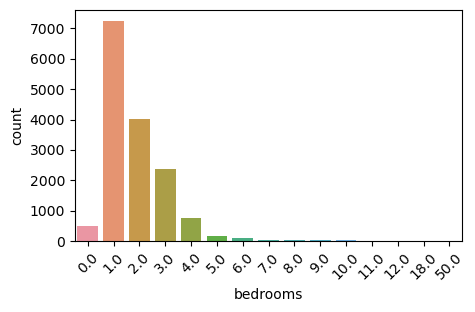

In [87]:
plt.figure(figsize = (5,3))
sns.countplot(data = df2, x = "bedrooms")
plt.xticks(rotation = 45)
plt.show()

In [88]:
# Comprobación valores nulos
df2['bedrooms'].isnull().sum()

10

In [89]:
df2['bedrooms'].describe()

count    15179.000000
mean         1.809671
std          1.243169
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: bedrooms, dtype: float64

In [90]:
df2[['price', 'bedrooms']].corr()

,price,bedrooms
price,1.00000,0.36035
bedrooms,0.36035,1.00000


In [91]:
# Convertir los valores mayores a 12 en NaN
df2.loc[df2['bedrooms'] > 12, 'bedrooms'] = np.nan

In [92]:
# Calcular el promedio de la columna 'bedrooms'
mode_value = df2['bedrooms'].mode()[0]
mode_value

1.0

In [93]:
# Sustituir los valores nulos por el promedio
df2['bedrooms'] = df2['bedrooms'].fillna(mode_value)

In [94]:
# Comprobación valores nulos 
df2['bedrooms'].isnull().sum()

0

### 'beds'

Esta variable indica el número de camas en el alojamiento. Se ha decidido reemplazar los 102 valores nulos iniciales con  la moda de la columna, dado que la relación entre el número de camas y el precio es débil y no afectará significativamente al modelo, su tipo de dato es correcto.

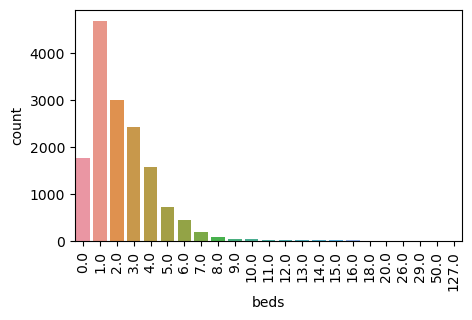

In [95]:
plt.figure(figsize = (5,3))
sns.countplot(data = df2, x = "beds")
plt.xticks(rotation = 90)
plt.show()

In [96]:
# Comprobación valores nulos 
df2['beds'].isnull().sum()

102

In [97]:
df2['beds'].describe()

count    15087.000000
mean         2.299596
std          2.234019
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        127.000000
Name: beds, dtype: float64

In [98]:
df2[['price', 'beds']].corr()

,price,beds
price,1.000000,0.306516
beds,0.306516,1.000000


In [99]:
# Convertir los valores mayores a 20 en NaN
df2.loc[df2['beds'] > 20, 'beds'] = np.nan

In [100]:
# Calcular el promedio de la columna 'beds'
mean_value1 = df2['beds'].mean()

In [101]:
# Sustituir los valores nulos por el promedio
df2['beds'] = df2['beds'].fillna(mean_value1)

In [102]:
# Comprobación valores nulos 
df2['beds'].isnull().sum()

0

### 'minimum_nights'

Aunque esta columna originalmente no contiene valores nulos, se han identificado algunos valores atípicos que podrían afectar negativamente el rendimiento del modelo. Por lo tanto, se ha decidido convertir los valores superiores a 400 noches en NaN y luego reemplazarlos con la mediana de la columna para mitigar el impacto de estos valores atípicos.

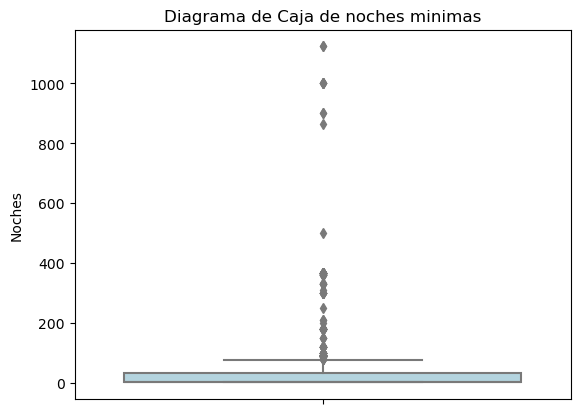

In [103]:
sns.boxplot(y=df['minimum_nights'], color='lightblue')

# Añadir etiquetas y título
plt.ylabel('Noches')
plt.title('Diagrama de Caja de noches minimas')

# Mostrar la gráfica
plt.show()

In [104]:
# Comprobación valores nulos 
df2['minimum_nights'].isnull().sum()

0

In [105]:
# Convertir los valores mayores a 400 en NaN
df2.loc[df2['minimum_nights'] > 400, 'minimum_nights'] = np.nan

In [106]:
# Calcular la mediana de la columna 'minimum_nights'
median_value = df2['minimum_nights'].median()

In [107]:
#Sustituir nulos por la mediana
df2['minimum_nights'] = df2['minimum_nights'].fillna(median_value)

In [108]:
df2[['price', 'minimum_nights']].corr()

,price,minimum_nights
price,1.000000,-0.203179
minimum_nights,-0.203179,1.000000


### 'maximum_nights'

Aunque la columna maximum_nights originalmente no contiene valores nulos, se han identificado valores atípicos que podrían afectar negativamente el rendimiento del modelo. Por lo tanto, se ha decidido convertir los valores superiores a 400 noches en NaN y luego reemplazarlos con la mediana de la columna para mitigar el impacto de estos valores atípicos. Se ha aplicado el mismo criterio que en la columna anterior.

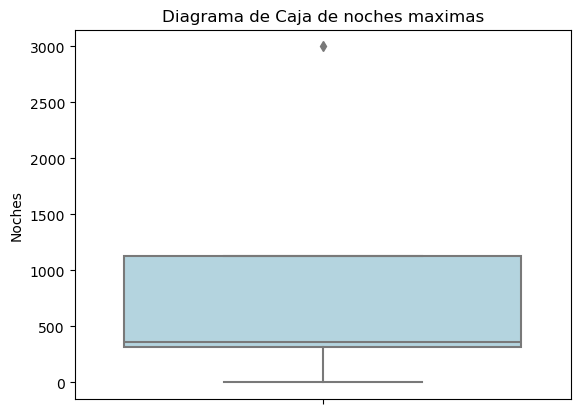

In [109]:
sns.boxplot(y=df['maximum_nights'], color='lightblue')

# Añadir etiquetas y título
plt.ylabel('Noches')
plt.title('Diagrama de Caja de noches maximas')

# Mostrar la gráfica
plt.show()

In [110]:
# Comprobación valores nulos 
df2['maximum_nights'].isnull().sum()

0

In [111]:
# Convertir los valores mayores a 400 en NaN
df2.loc[df2['maximum_nights'] > 1500, 'maximum_nights'] = np.nan

In [112]:
# Calcular la mediana de la columna 'maximum_nights'
median_value = df2['maximum_nights'].median()
median_value

365.0

In [113]:
# Sustituir nulos por la mediana
df2['maximum_nights'] = df2['maximum_nights'].fillna(median_value)

In [114]:
df2[['price', 'maximum_nights']].corr()

,price,maximum_nights
price,1.00000,0.06068
maximum_nights,0.06068,1.00000


### 'has_availability'

Esta columna indica la disponibilidad del Airbnb y originalmente contenía 89 valores nulos. Estos valores han sido reemplazados por la moda, y la columna se ha convertido a un formato booleano, donde los valores nulos se interpretan como True.

In [115]:
df2["has_availability"].unique()

array(['t', 'f', nan], dtype=object)

In [116]:
# Comprobación valores nulos 
df2["has_availability"].isnull().sum()

89

In [117]:
df2['has_availability'].describe()

count     15100
unique        2
top           t
freq      15079
Name: has_availability, dtype: object

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


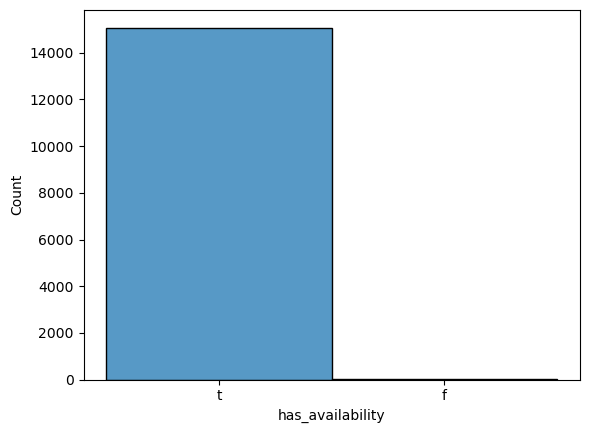

In [118]:
sns.histplot(data = df2, x='has_availability')
plt.show()

In [119]:
# Completar celdas vacias con True (Moda)
df2['has_availability'] = df2['has_availability'].map({'t': True, 'f': False}).fillna(True)

In [120]:
# Convertir columna a tipo booleano
df2['has_availability'] = df2['has_availability'].astype(bool)

In [121]:
# Comprobación valores nulos
df2["has_availability"].isnull().sum()

0

In [122]:
# Comprobación valores únicos
df2['has_availability'].unique()

array([ True, False])

In [123]:
df2[['price', 'has_availability']].corr()

,price,has_availability
price,1.000000,0.010551
has_availability,0.010551,1.000000


### 'availability_30'

La variable availability_30 indica el número de días en los próximos 30 días en que el alojamiento está disponible. No presenta valores nulos y su tipo de dato es adecuado para el análisis.

In [124]:
df2['availability_30'].describe()

count    15189.000000
mean         9.009481
std          9.287413
min          0.000000
25%          1.000000
50%          6.000000
75%         15.000000
max         30.000000
Name: availability_30, dtype: float64

In [125]:
df2['availability_30'].isnull().sum()

0

In [126]:
df2[['price', 'availability_30']].corr()

,price,availability_30
price,1.000000,0.099842
availability_30,0.099842,1.000000


### 'availability_60'

La variable availability_60 indica el número de días en los próximos 60 días en que el alojamiento está disponible. No presenta valores nulos y su tipo de dato es adecuado para el análisis.

In [127]:
df2['availability_60'].describe()

count    15189.000000
mean        23.666930
std         19.204731
min          0.000000
25%          7.000000
50%         19.000000
75%         40.000000
max         60.000000
Name: availability_60, dtype: float64

In [128]:
df2['availability_60'].isnull().sum()

0

In [129]:
df2[['price', 'availability_60']].corr()

,price,availability_60
price,1.000000,0.085193
availability_60,0.085193,1.000000


### 'last_review'

La variable 'last_review' tenía originalmente 3,317 valores nulos, los cuales se han reemplazado con el promedio de días transcurridos desde la última review del alojamiento hasta una fecha específica, en este caso, la fecha de descarga del dataset. El tipo de dato es adecuado para el modelo.

In [130]:
df2["last_review"].describe()

count          11872
unique          1023
top       2024-06-09
freq             393
Name: last_review, dtype: object

In [131]:
# Comprobación nulos 
df2["last_review"].isnull().sum()

3317

In [132]:
# Convertir la columna last_review a formato datetime
df2['last_review'] = pd.to_datetime(df2['last_review'])

In [133]:
# Crear un objeto Timestamp específico (fecha de descarga del DataSet)
fecha_especifica = pd.Timestamp('2024-08-05')

In [134]:
# Calcular la diferencia en días entre fecha_especifica y last_review
df2['last_review'] = (fecha_especifica - df2['last_review']).dt.days

In [135]:
df2['last_review'].describe()

count    11872.000000
mean       193.116240
std        344.626397
min         52.000000
25%         63.000000
50%         75.000000
75%        156.000000
max       4792.000000
Name: last_review, dtype: float64

In [136]:
# Calcular el promedio de los días en la columna 'last_review' del DataFrame df2
promedio_dias = df2['last_review'].mean()

In [137]:
# Reemplazar valores NaN en 'last_review' con el promedio calculado
df2['last_review'] = df2['last_review'].fillna(promedio_dias)

In [138]:
# Comprobación valores nulos 
df2["last_review"].isnull().sum()

0

In [139]:
df2[['price', 'last_review']].corr()

,price,last_review
price,1.00000,-0.01265
last_review,-0.01265,1.00000


### 'review_scores_rating'

La variable review_scores_rating contenía originalmente 3,317 valores nulos. Se ha identificado que el promedio de las valoraciones es de 4.59, donde se concentra la mayoría de los ratings. Por lo tanto, se ha decidido reemplazar los valores nulos con este promedio. El tipo de dato es adecuado para el modelo. (Valoracion general del alojamiento)

In [140]:
df2['review_scores_rating'].isnull().sum()

3317

In [141]:
df2['review_scores_rating'].describe()

count    11872.000000
mean         4.591732
std          0.480347
min          1.000000
25%          4.460000
50%          4.700000
75%          4.890000
max          5.000000
Name: review_scores_rating, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


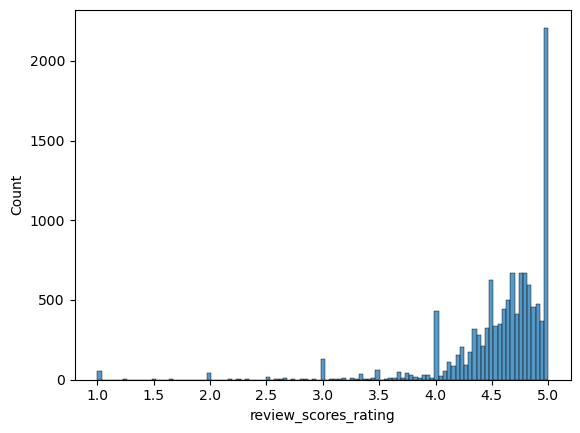

In [142]:
sns.histplot(data = df2, x='review_scores_rating')
plt.show()

In [143]:
# Reemplazar valores faltantes por media
df2['review_scores_rating'] = df2['review_scores_rating'].fillna(df2['review_scores_rating'].mean())

In [144]:
# Comprobación valores nulos 
df2["review_scores_rating"].isnull().sum()

0

In [145]:
df2[['price', 'review_scores_rating']].corr()

,price,review_scores_rating
price,1.000000,0.018213
review_scores_rating,0.018213,1.000000


### 'review_scores_cleanliness'

La variable review_scores_cleanliness contenía originalmente 3,335 valores nulos. El promedio de las valoraciones es de 4.62, que refleja la mayoría de los ratings. Por lo tanto, se ha decidido reemplazar los valores nulos con este promedio. El tipo de dato es adecuado para el modelo. (Valoracion de la limpieza del alojamiento)

In [146]:
df2["review_scores_cleanliness"].isnull().sum()

3335

In [147]:
df2["review_scores_cleanliness"].describe()

count    11854.000000
mean         4.618333
std          0.461061
min          1.000000
25%          4.500000
50%          4.740000
75%          4.910000
max          5.000000
Name: review_scores_cleanliness, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


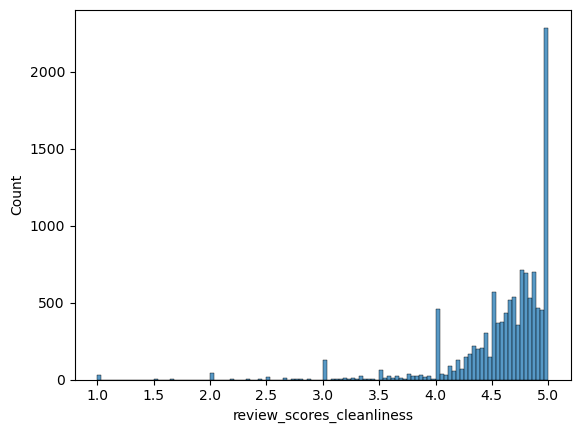

In [148]:
sns.histplot(data = df2, x='review_scores_cleanliness')
plt.show()

In [149]:
# Reemplazar valores faltantes por media
df2['review_scores_cleanliness'] = df2['review_scores_cleanliness'].fillna(df2['review_scores_cleanliness'].mean())

In [150]:
# Comprobación valores nulos 
df2["review_scores_cleanliness"].isnull().sum()

0

In [151]:
df2[['price', 'review_scores_cleanliness']].corr()

,price,review_scores_cleanliness
price,1.00000,0.04443
review_scores_cleanliness,0.04443,1.00000


### 'review_scores_checkin'

La variable review_scores_checkin contenía originalmente 3,335 valores nulos. El promedio de las valoraciones es de 4.72, que representa la tendencia principal de los ratings. Por lo tanto, se ha decidido reemplazar los valores nulos con este promedio. El tipo de dato es adecuado para el modelo.(Valoracion del checkin del alojamiento)

In [152]:
df2.review_scores_checkin.isnull().sum()

3335

In [153]:
df2.review_scores_checkin.describe()

count    11854.000000
mean         4.719024
std          0.431020
min          1.000000
25%          4.660000
50%          4.840000
75%          4.990000
max          5.000000
Name: review_scores_checkin, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


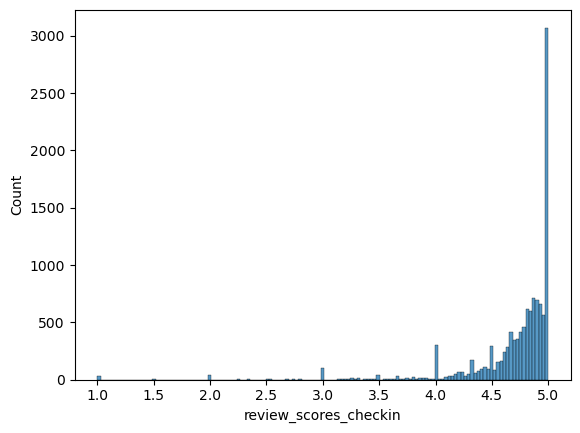

In [154]:
sns.histplot(data = df2, x='review_scores_checkin')
plt.show()

In [155]:
# Completar valor nulos con la media
media_checkin =  round(df2['review_scores_checkin'].mean(), 6)

df2['review_scores_checkin'] = df2['review_scores_checkin'].fillna(media_checkin)

In [156]:
# Comprobación valores nulos
df2.review_scores_checkin.isnull().sum()

0

In [157]:
df2[['price', 'review_scores_cleanliness']].corr()

,price,review_scores_cleanliness
price,1.00000,0.04443
review_scores_cleanliness,0.04443,1.00000


### 'review_scores_communication'

La variable review_scores_communication contenía originalmente 3,334 valores nulos. Dado que el promedio de las valoraciones es de 4.72, que refleja la tendencia general de los ratings, se ha decidido reemplazar los valores nulos con este promedio. El tipo de dato es adecuado para el modelo.(Valoracion de la comunicacion del alojamiento)

In [158]:
df2.review_scores_communication.isnull().sum()

3334

In [159]:
df2.review_scores_communication.describe()

count    11855.000000
mean         4.722860
std          0.438973
min          1.000000
25%          4.660000
50%          4.850000
75%          4.990000
max          5.000000
Name: review_scores_communication, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


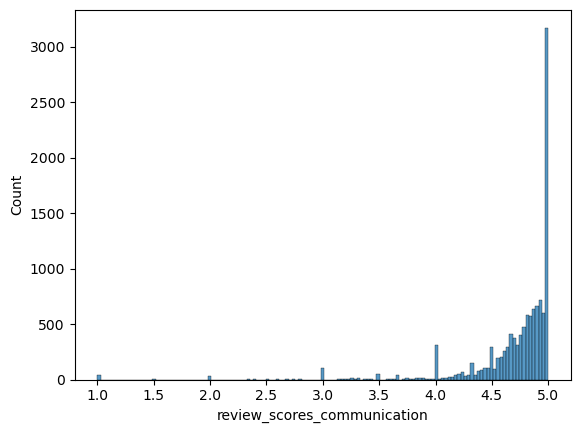

In [160]:
sns.histplot(data = df2, x='review_scores_communication')
plt.show()

In [161]:
# Completar valor nulos con la media
media_communication = df2['review_scores_communication'].mean()

df2['review_scores_communication'] = df2['review_scores_communication'].fillna(media_communication)

In [162]:
# Comprobación valores nulos
df2.review_scores_communication.isnull().sum()

0

In [163]:
df2[['price', 'review_scores_communication']].corr()

,price,review_scores_communication
price,1.000000,0.018429
review_scores_communication,0.018429,1.000000


### 'review_scores_location'

La variable review_scores_location contenía originalmente 3,335 valores nulos. Con un promedio de valoraciones de 4.75, que refleja la tendencia predominante de los ratings, se ha optado por reemplazar los valores nulos con este promedio. El tipo de dato es adecuado para el modelo. (Valoracion de la ubicacion del alojamiento)

In [164]:
df2.review_scores_location.isnull().sum()

3335

In [165]:
df2.review_scores_location.describe()

count    11854.000000
mean         4.752015
std          0.351692
min          1.000000
25%          4.680000
50%          4.840000
75%          4.970000
max          5.000000
Name: review_scores_location, dtype: float64

In [166]:
# Completar valor nulos con la media
media_location = df2['review_scores_location'].mean()

df2['review_scores_location'] = df2['review_scores_location'].fillna(media_location)

In [167]:
# Comprobación valores nulos
df2.review_scores_location.isnull().sum()

0

In [168]:
df2[['price', 'review_scores_location']].corr()

,price,review_scores_location
price,1.000000,0.038847
review_scores_location,0.038847,1.000000


### 'review_scores_value'

La variable review_scores_value contenía originalmente 3,334 valores nulos. Con un promedio de valoraciones de 4.45, que refleja la tendencia general de los ratings, se ha decidido reemplazar los valores nulos con este promedio. Esta variable mide cómo los huéspedes perciben la relación calidad-precio del alojamiento, y el tipo de dato es adecuado para el modelo.

In [169]:
df2.review_scores_value.isnull().sum()

3334

In [170]:
df2.review_scores_value.describe()

count    11855.000000
mean         4.454393
std          0.523985
min          1.000000
25%          4.300000
50%          4.560000
75%          4.750000
max          5.000000
Name: review_scores_value, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


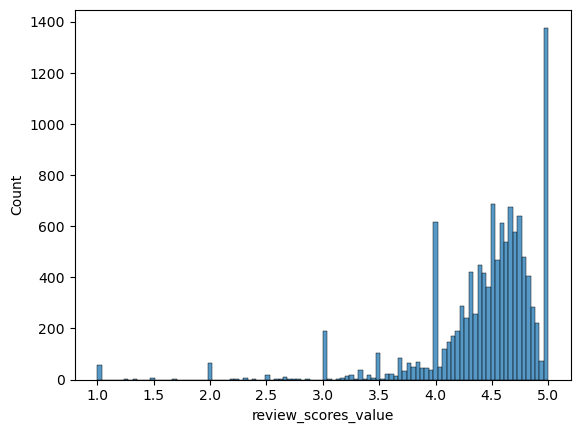

In [171]:
sns.histplot(data = df2, x='review_scores_value')
plt.show()

In [172]:
# Completar valor nulos con la media
media_value = df2['review_scores_value'].mean()

df2['review_scores_value'] = df2['review_scores_value'].fillna(media_value)

In [173]:
# Comprobación valores nulos
df2.review_scores_value.isnull().sum()

0

In [174]:
df2[['price', 'review_scores_value']].corr()

,price,review_scores_value
price,1.000000,0.025752
review_scores_value,0.025752,1.000000


### 'reviews_per_month'

La variable reviews_per_month contenía originalmente 3,317 valores nulos. Dado que el promedio de reseñas es de 1.71, que refleja la tendencia general, se ha decidido reemplazar los valores nulos con este promedio. Esta variable mide la frecuencia con la que se reciben reseñas del alojamiento cada mes, proporcionando una indicación de la actividad y popularidad del alojamiento. El tipo de dato es adecuado para el modelo.

In [175]:
df2.reviews_per_month.isnull().sum()

3317

In [176]:
df2.reviews_per_month.describe()

count    11872.000000
mean         1.713690
std          2.115342
min          0.010000
25%          0.320000
50%          1.080000
75%          2.520000
max         70.470000
Name: reviews_per_month, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


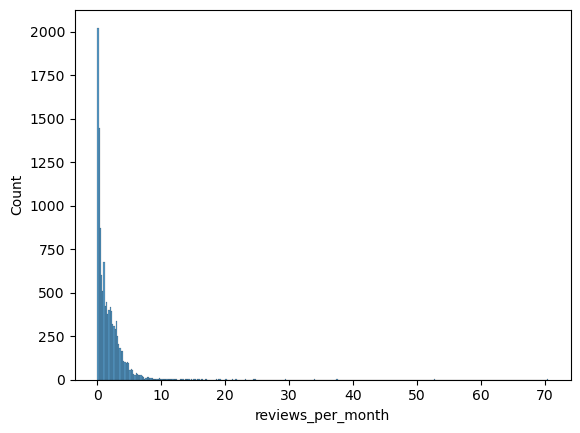

In [177]:
sns.histplot(data = df2, x='reviews_per_month')
plt.show()

In [178]:
# Completar valor nulos con la media
media_reviews_per_month = df2['reviews_per_month'].mean()

df2['reviews_per_month'] = df2['reviews_per_month'].fillna(media_reviews_per_month)

In [179]:
# Comprobación nulos
df2.reviews_per_month.isnull().sum()

0

In [180]:
df2[['price', 'reviews_per_month']].corr()

,price,reviews_per_month
price,1.000000,0.019012
reviews_per_month,0.019012,1.000000


### 'license'

La variable license contenía originalmente 4,163 valores nulos. A partir de esta columna, hemos creado una nueva columna llamada has_license, que indica True si la columna license contiene información y False si el dato está vacío, lo que indica la ausencia de licencia. Posteriormente, se ha convertido la columna has_license a un tipo de dato booleano.

In [181]:
df2['license'].isnull().sum()

4163

In [182]:
# A partir de esta columna, creamos otra llamada 'has_license' que indique True si la columna tiene info, else false
df2['has_license'] = df2['license'].notna()

In [183]:
# Contamos los TRUE y FALSE
df2.groupby('has_license').count()

,description,name,host_since,host_location,host_is_superhost,host_identity_verified,host_has_profile_pic,neighbourhood,latitude,longitude,...,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,license,instant_bookable,bathroom_type
has_license,,,,,,,,,,,,,,,,,,,,,
False,3992,4163,4163,4163,4163,4163,4163,4163,4163,4163,...,4163,4163,4163,4163,4163,4163,4163,0,4163,4163
True,10710,11026,11026,11026,11026,11026,11026,11026,11026,11026,...,11026,11026,11026,11026,11026,11026,11026,11026,11026,11026


In [184]:
# Convertir columna a tipo de dato booleano
df2['has_license'] = df2['has_license'].astype(bool)

In [185]:
# Comprobación valores únicos
df2['has_license'].unique()

array([ True, False])

#### drop 'license'

In [186]:
# Eliminación columna license
df2.drop('license', axis=1, inplace=True)

### 'has_license'

Esta variable se ha creado a partir de la columna license y permite identificar si un alojamiento posee una licencia de Airbnb o no.

In [187]:
df2['has_license'].isnull().sum()

0

In [188]:
df2['has_license'].describe()

count     15189
unique        2
top        True
freq      11026
Name: has_license, dtype: object

In [189]:
df2[['price', 'has_license']].corr()

,price,has_license
price,1.000000,0.175095
has_license,0.175095,1.000000


### 'instant_bookable'

La columna instant_bookable indica si el alojamiento puede ser reservado de forma instantánea sin necesidad de aprobación del anfitrión. No contiene valores nulos, y solo se ha modificado su tipo de dato a booleano.

In [190]:
# Comprobación valores únicos
df2['instant_bookable'].unique()

array(['t', 'f'], dtype=object)

In [191]:
# Convertir columna a tipo de dato booleano
df2['instant_bookable'] = df2['instant_bookable'].replace({'t': True, 'f': False})

In [192]:
# Comprobación tipo de dato
df2['instant_bookable'].dtype

dtype('bool')

### 'name', 'description' y 'amenities'

A partir de las variables de texto libre name, description y amenities, hemos creado cinco variables booleanas que proporcionarán información valiosa para nuestro modelo. Estas variables representan las cinco comodidades más demandadas en las búsquedas de Airbnb en Barcelona, y devuelven True o False según si el alojamiento dispone o no de cada comodidad. Las nuevas variables son: 'has_terrace', 'has_wifi', 'pet_allowed', 'has_AC' y 'has_kitchen'.

In [193]:
# Crear una función para limpiar texto, eliminando caracteres no alfabéticos y convirtiendo todo a minúsculas.
def limpiar_texto(texto):
    if pd.isna(texto):
        return ''
    texto = texto.lower()
    texto = re.sub(r'[^a-z\s]', '', texto)
    return texto 

In [194]:
df2['name'] = df2['name'].apply(limpiar_texto)
df2['description'] = df2['description'].apply(limpiar_texto)
df2['amenities'] = df2['amenities'].apply(limpiar_texto)

In [195]:
# Crear función para verificar la presencia de palabras clave 
def verificar_palabras_filas(row, palabras):
    for columna in ['amenities', 'name', 'description']:
        if any(palabra in row[columna] for palabra in palabras):
            return 1  # TRUE
    return 0          # FALSE

In [196]:
# Definir palabras clave
palabras_a_buscar = ['terrace', 'veranda', 'balcony']
palabras_a_buscar2 = ['wifi', 'wireless internet', 'wireless connection']
palabras_a_buscar3 = ['pet', 'pet-friendly', 'pets allowed', 'pet accommodation']
palabras_a_buscar4 = ['air', 'air conditioning', 'ac (air conditioning)', 'climate control']
palabras_a_buscar5 = ['kitchen', 'cooking area', 'culinary space']

In [197]:
# Crear nuevas columnas referentes a las amenities
df2['has_terrace'] = df2.apply(verificar_palabras_filas, axis=1, palabras=palabras_a_buscar)
df2['has_wifi'] = df2.apply(verificar_palabras_filas, axis=1, palabras=palabras_a_buscar2)
df2['pet_allowed'] = df2.apply(verificar_palabras_filas, axis=1, palabras=palabras_a_buscar3)
df2['has_AC'] = df2.apply(verificar_palabras_filas, axis=1, palabras=palabras_a_buscar4)
df2['has_kitchen'] = df2.apply(verificar_palabras_filas, axis=1, palabras=palabras_a_buscar5)

In [198]:
# Conteos
conteo1 = df2['has_terrace'].value_counts()
print(conteo1)

conteo2 = df2['has_wifi'].value_counts()
print(conteo2)

conteo3 = df2['pet_allowed'].value_counts()
print(conteo3)

conteo4 = df2['has_AC'].value_counts()
print(conteo4)

conteo5 = df2['has_kitchen'].value_counts()
print(conteo5)

has_terrace
1    8145
0    7044
Name: count, dtype: int64
has_wifi
1    14947
0      242
Name: count, dtype: int64
pet_allowed
0    12597
1     2592
Name: count, dtype: int64
has_AC
1    13745
0     1444
Name: count, dtype: int64
has_kitchen
1    14046
0     1143
Name: count, dtype: int64


In [199]:
print(df2[['has_terrace', 'has_wifi', 'pet_allowed', 'has_AC', 'has_kitchen']].head())

   has_terrace  has_wifi  pet_allowed  has_AC  has_kitchen
0            1         1            0       1            1
1            0         1            0       0            1
2            1         1            0       1            1
4            1         1            0       1            1
5            1         1            0       1            1


#### drop 'name', 'description', 'amenities'

In [200]:
# Eliminación columnas 'name', 'description' y 'amenities'
df2 = df2.drop(columns=['name', 'description', 'amenities'])

### 'has_terrace'

La variable has_terrace se creó tras identificar las comodidades más demandadas en las búsquedas de alojamiento en Airbnb en Barcelona. Indica si un alojamiento dispone de terraza o balcón, asignando True a aquellos que cuentan con esta característica y False a los que no, ya que ha sido convertida a una variable booleana.

In [201]:
df2['has_terrace'].unique()

array([1, 0])

In [202]:
df2['has_terrace'] = df2['has_terrace'].astype('bool')

In [203]:
df2['has_terrace'].unique()

array([ True, False])

### 'has_wifi'

La variable has_wifi se creó tras identificar las comodidades más solicitadas en las búsquedas de alojamiento en Airbnb en Barcelona. Esta variable indica si un alojamiento ofrece conexión inalámbrica a internet (wifi), asignando True a aquellos que disponen de este servicio y False a los que no, ya que ha sido convertida en una variable booleana.

In [204]:
df2['has_wifi'].unique()

array([1, 0])

In [205]:
df2['has_wifi'] = df2['has_wifi'].astype('bool')

In [206]:
df2['has_wifi'].unique()

array([ True, False])

### 'pet_allowed'

La variable pet_allowed se creó tras identificar las comodidades más demandadas en las búsquedas de alojamiento en Airbnb en Barcelona. Esta variable indica si un alojamiento permite mascotas, asignando True a los que aceptan mascotas y False a los que no, ya que ha sido convertida en una variable booleana.

In [207]:
df2['pet_allowed'].unique()

array([0, 1])

In [208]:
df2['pet_allowed'] = df2['pet_allowed'].astype('bool')

In [209]:
df2['pet_allowed'].unique()

array([False,  True])

### 'has_AC'

La variable has_AC se creó tras identificar las comodidades más demandadas en las búsquedas de alojamiento en Airbnb en Barcelona. Esta variable indica si un alojamiento dispone de aire acondicionado, asignando True a los que lo tienen y False a los que no, ya que ha sido convertida en una variable booleana.

In [210]:
df2['has_AC'].unique()

array([1, 0])

In [211]:
df2['has_AC'] = df2['has_AC'].astype('bool')

In [212]:
df2['has_AC'].unique()

array([ True, False])

###  'has_kitchen'

La variable has_kitchen se creó a partir de la identificación de las comodidades más solicitadas en las búsquedas de alojamiento en Airbnb en Barcelona. Esta variable indica si un alojamiento dispone de cocina, asignando True a aquellos que cuentan con esta característica y False a los que no, ya que ha sido convertida en una variable booleana.

In [213]:
df2['has_kitchen'].unique()

array([1, 0])

In [214]:
df2['has_kitchen'] = df2['has_kitchen'].astype('bool')

In [215]:
df2['has_kitchen'].unique()

array([ True, False])

# Verificacion de df2 (limpio)

## Verificacion nulos df2

In [216]:
df2.isnull().sum()

host_since                     0
host_location                  0
host_is_superhost              0
host_identity_verified         0
host_has_profile_pic           0
neighbourhood                  0
latitude                       0
longitude                      0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_30                0
availability_60                0
number_of_reviews              0
last_review                    0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
instant_bookable               0
bathroom_type                  0
has_licens

## Informacion df2

In [217]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15189 entries, 0 to 18924
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   15189 non-null  int64  
 1   host_location                15189 non-null  object 
 2   host_is_superhost            15189 non-null  bool   
 3   host_identity_verified       15189 non-null  bool   
 4   host_has_profile_pic         15189 non-null  bool   
 5   neighbourhood                15189 non-null  object 
 6   latitude                     15189 non-null  float64
 7   longitude                    15189 non-null  float64
 8   room_type                    15189 non-null  object 
 9   accommodates                 15189 non-null  int64  
 10  bathrooms                    15189 non-null  float64
 11  bedrooms                     15189 non-null  float64
 12  beds                         15189 non-null  float64
 13  price                

## Shape df2

In [218]:
df2.shape

(15189, 36)

## Columnas df2

In [219]:
list(enumerate(df2.columns))

[(0, 'host_since'),
 (1, 'host_location'),
 (2, 'host_is_superhost'),
 (3, 'host_identity_verified'),
 (4, 'host_has_profile_pic'),
 (5, 'neighbourhood'),
 (6, 'latitude'),
 (7, 'longitude'),
 (8, 'room_type'),
 (9, 'accommodates'),
 (10, 'bathrooms'),
 (11, 'bedrooms'),
 (12, 'beds'),
 (13, 'price'),
 (14, 'minimum_nights'),
 (15, 'maximum_nights'),
 (16, 'has_availability'),
 (17, 'availability_30'),
 (18, 'availability_60'),
 (19, 'number_of_reviews'),
 (20, 'last_review'),
 (21, 'review_scores_rating'),
 (22, 'review_scores_cleanliness'),
 (23, 'review_scores_checkin'),
 (24, 'review_scores_communication'),
 (25, 'review_scores_location'),
 (26, 'review_scores_value'),
 (27, 'reviews_per_month'),
 (28, 'instant_bookable'),
 (29, 'bathroom_type'),
 (30, 'has_license'),
 (31, 'has_terrace'),
 (32, 'has_wifi'),
 (33, 'pet_allowed'),
 (34, 'has_AC'),
 (35, 'has_kitchen')]

# Distribucion variable objetivo ('price')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

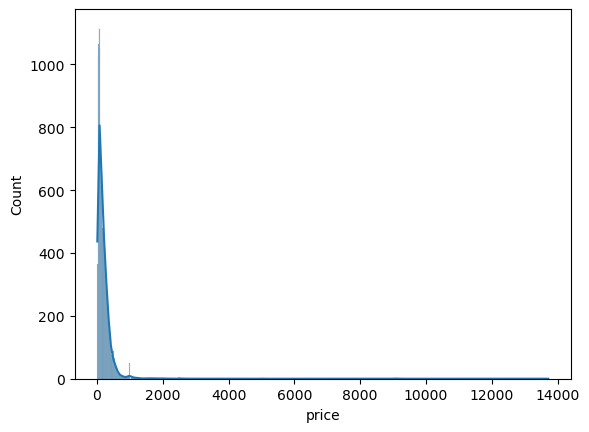

In [220]:
sns.histplot(df2['price'], kde=True)

Este gráfico muestra una distribución de precios sesgada hacia la izquierda, donde la mayoría de los precios se concentran en valores bajos, probablemente por debajo de los 1000. Esto sugiere que la mayoría de las propiedades analizadas tienen precios accesibles, lo que podría apuntar a una oferta abundante de opciones económicas. Sin embargo, también se observa una larga cola que se extiende hacia valores altos, indicando la existencia de algunos precios significativamente más elevados que el promedio, posiblemente representando propiedades de lujo. La distribución asimétrica refleja que los precios altos son raros, mientras que los bajos son mucho más comunes, lo que podría indicar un mercado dominado por la accesibilidad con algunas excepciones de mayor costo.

# Relación de las variables categóricas con 'price'

## 'neighbourhood'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'eixample'),
  Text(1, 0, 'ciutat_vella'),
  Text(2, 0, 'sant_marti'),
  Text(3, 0, 'gracia'),
  Text(4, 0, 'sarria_sant_gervasi'),
  Text(5, 0, 'sants_montjuic'),
  Text(6, 0, 'les_corts'),
  Text(7, 0, 'horta_guinardo'),
  Text(8, 0, 'sant_andreu'),
  Text(9, 0, 'nou_barris')])

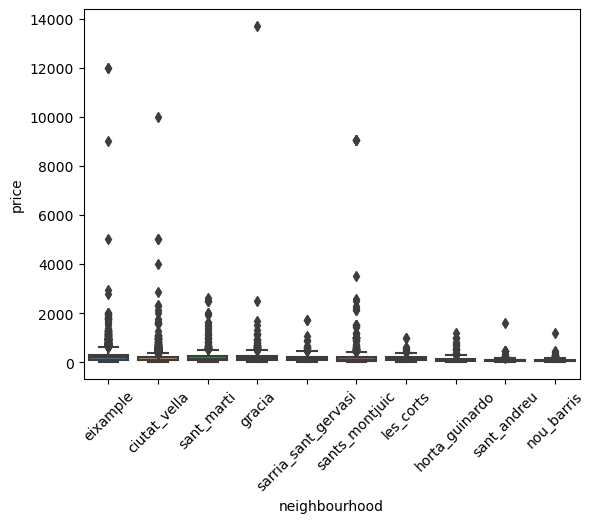

In [221]:
sns.boxplot(x='neighbourhood', y='price', data=df2)
plt.xticks(rotation=45)

Este gráfico muestra la distribución de precios por diferentes barrios, con una gran concentración de precios bajos en la mayoría de los vecindarios. Sin embargo, hay algunos valores atípicos que destacan con precios significativamente más altos, especialmente en los barrios como Eixample y Ciutat Vella, donde se observan los precios más extremos, llegando hasta los 14,000. Estos barrios parecen tener una mayor variabilidad de precios en comparación con otros como Nou Barris o Sant Andreu, que tienen precios más consistentes y menos dispersos. Esto podría indicar que áreas como Eixample y Ciutat Vella tienen una mayor oferta de propiedades de lujo, mientras que en barrios más periféricos, los precios tienden a ser más estables y accesibles.

## 'host_location'

(array([0, 1, 2]),
 [Text(0, 0, 'spain'), Text(1, 0, 'no_info'), Text(2, 0, 'other')])

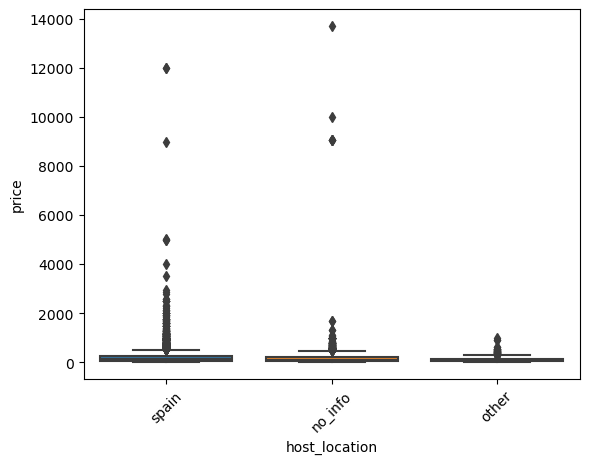

In [222]:
sns.boxplot(x='host_location', y='price', data=df2)
plt.xticks(rotation=45)

Este gráfico muestra la relación entre la ubicación del anfitrión y los precios de los alojamientos. Algunos patrones observados:

España (Spain): Los anfitriones ubicados en España presentan una mayor dispersión de precios, con varios valores atípicos que alcanzan hasta los 14,000. Esto sugiere que los anfitriones locales pueden tener una mayor oferta de propiedades de lujo o con precios más altos.

Sin información (no_info): Los precios de los anfitriones sin ubicación clara tienen menos variabilidad en comparación con los anfitriones en España, aunque todavía hay algunos precios altos que superan los 4,000.

Fuera de España (no_spain): Los anfitriones ubicados fuera de España parecen tener los precios más bajos y más consistentes, con menos valores extremos, lo que sugiere una oferta de alojamientos más accesibles.

En general, los anfitriones en España tienden a ofrecer una mayor variedad de precios, incluyendo opciones más caras, en comparación con los de fuera del país o sin información.

## 'room_type'

(array([0, 1, 2, 3]),
 [Text(0, 0, 'entire_home_apt'),
  Text(1, 0, 'private_room'),
  Text(2, 0, 'hotel_room'),
  Text(3, 0, 'shared_room')])

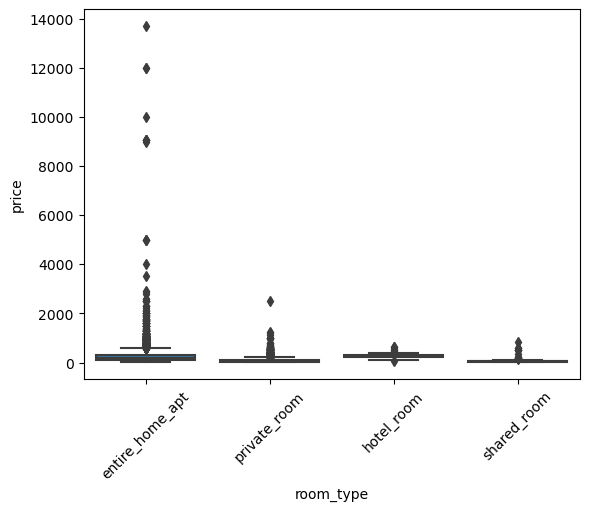

In [223]:
sns.boxplot(x='room_type', y='price', data=df2)
plt.xticks(rotation=45)

El gráfico muestra un boxplot de precios segmentados por tipo de alojamiento (room_type). Las categorías incluyen: entire_home_apt, private_room, hotel_room, y shared_room.

Variabilidad y precio máximo: La categoría entire_home_apt tiene la mayor variabilidad en precios y presenta varios outliers que superan los 10,000 unidades monetarias, lo que indica la posibilidad de propiedades de lujo o exclusivas.

Precios moderados: Las otras categorías (private_room, hotel_room, shared_room) tienen precios significativamente más bajos y menos dispersión. Aunque hay algunos outliers, estos son mucho menos extremos comparados con los de entire_home_apt.

Comparación general: En términos generales, entire_home_apt tiende a ser más costoso, mientras que las otras opciones ofrecen alojamientos más asequibles.

Conclusión: entire_home_apt es la opción más cara y variable, posiblemente reflejando una mayor diversidad en las propiedades y servicios ofrecidos. Las otras categorías son más consistentes y accesibles en precio.

# Convertir variables categóricas a variables dummy

In [224]:
df2 = pd.get_dummies(
    df2, 
    columns=['neighbourhood', 'host_location', 'room_type'], 
    drop_first=True
)

In [225]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15189 entries, 0 to 18924
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   host_since                         15189 non-null  int64  
 1   host_is_superhost                  15189 non-null  bool   
 2   host_identity_verified             15189 non-null  bool   
 3   host_has_profile_pic               15189 non-null  bool   
 4   latitude                           15189 non-null  float64
 5   longitude                          15189 non-null  float64
 6   accommodates                       15189 non-null  int64  
 7   bathrooms                          15189 non-null  float64
 8   bedrooms                           15189 non-null  float64
 9   beds                               15189 non-null  float64
 10  price                              15189 non-null  float64
 11  minimum_nights                     15189 non-null  float64


# Generar Modelo

In [226]:
X = df2.drop(columns='price')
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size = 0.75,
    test_size=0.25
)

In [227]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11391, 46) (3798, 46) (11391,) (3798,)


In [228]:
# Crear el modelo de random forest
rf_clf = RandomForestClassifier()

# Entrenar el modelo
rf_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_clf.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy del Random Forest: {accuracy_rf:.2f}')

Accuracy del Random Forest: 0.10
